In [1]:
import tweepy
import numpy as np
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
from config import (consumer_key, consumer_secret, access_token, access_token_secret)

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser = tweepy.parsers.JSONParser())

In [5]:
news_orgs = ['@BBC', '@CBSNews', '@CNN', '@FoxNews', '@nytimes']
    
counter = 1

oldest_tweet = None

sentiment = []
        
for org in news_orgs:
    for x in range(5):
        news_tweets = api.user_timeline(org)
        for tweet in news_tweets:
            results = analyzer.polarity_scores(tweet['text'])
            compound = results['compound']
            pos = results['pos']
            neu = results['neu']
            neg = results['neg']
            tweets_ago = counter
            
            oldest_tweet = tweet['id'] - 1
            
            sentiment.append({'News_Organization': org, 'Date': tweet['created_at'], 'Tweet': tweet['text'], 
                              'Compound': compound, 'Positive': pos, 'Neutral': neu,'Negative': neg, 
                              'Tweets_Ago': counter})
            
            counter += 1

In [13]:
sentiment_final = pd.DataFrame(sentiment)
sentiment_final.head()

,Compound,Date,Negative,Neutral,News_Organization,Positive,Tweet,Tweets_Ago
0,0.2732,Wed Apr 11 19:03:05 +0000 2018,0.000,0.890,@BBC,0.110,"Tonight, @bettanyhughes investigates the story...",1
1,0.1531,Wed Apr 11 18:00:22 +0000 2018,0.000,0.814,@BBC,0.186,💪🥊🇲🇱🇫🇷\nAya Cissoko has always been a fighter....,2
2,0.0000,Wed Apr 11 16:24:06 +0000 2018,0.000,1.000,@BBC,0.000,RT @bbcwritersroom: Just announced - the 10 #...,3
3,0.4939,Wed Apr 11 16:00:22 +0000 2018,0.146,0.538,@BBC,0.315,"🎨 Rujazzle is a drag queen, artist and Scottis...",4
4,0.0000,Wed Apr 11 14:01:05 +0000 2018,0.000,1.000,@BBC,0.000,😎☀️ Summer's coming to #SLFN!\nWho can't wait ...,5


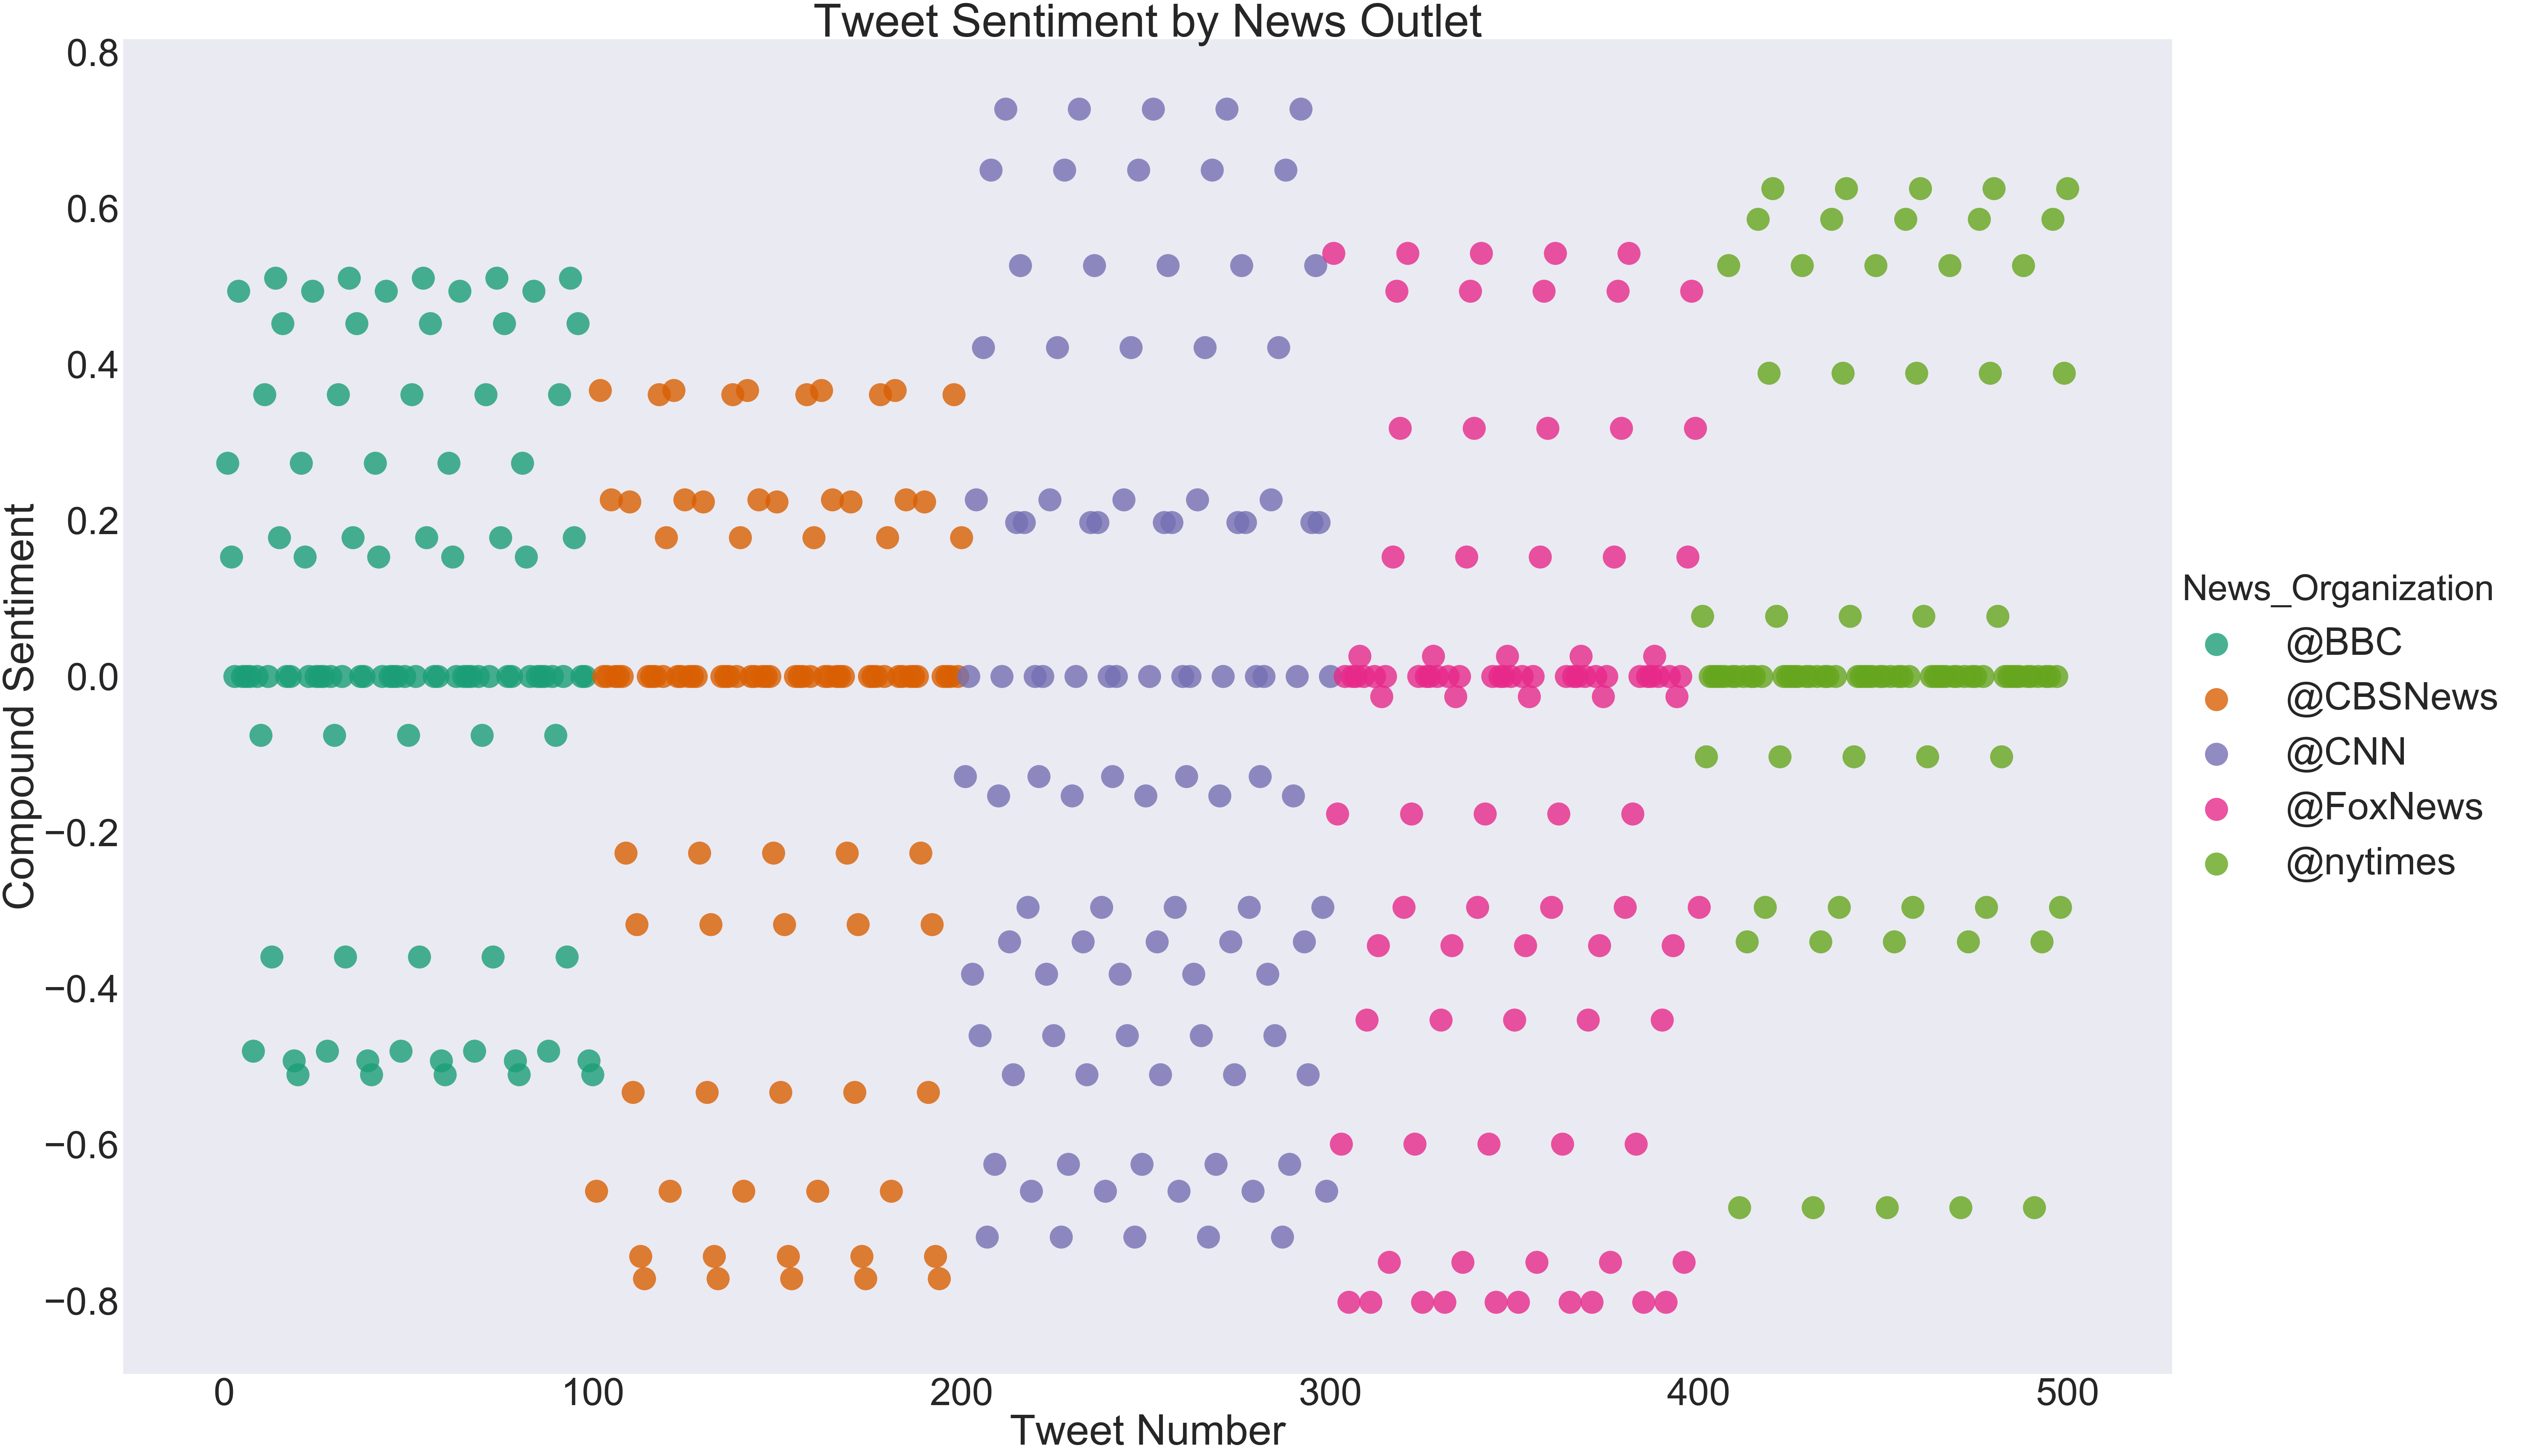

In [17]:
sns.set('talk', style = 'dark', palette = 'Dark2', font_scale = 7)
sns.lmplot('Tweets_Ago', 'Compound', hue = 'News_Organization', data = sentiment_final, fit_reg = False, aspect = 1.5,
          size = 50, scatter_kws = {'s' : 3000}) 
plt.title('Tweet Sentiment by News Outlet')
plt.xlabel('Tweet Number')
plt.ylabel('Compound Sentiment')
plt.show()

In [8]:
tweet_pivot = pd.pivot_table(sentiment_final, values = 'Compound', index = 'News_Organization')
tweet_pivot

,Compound
News_Organization,
@BBC,0.025190
@CBSNews,-0.094830
@CNN,-0.066430
@FoxNews,-0.135185
@nytimes,0.039185


In [9]:
x_axis = ['BBC', 'CBS News', 'CNN', 'Fox', 'New York Times']

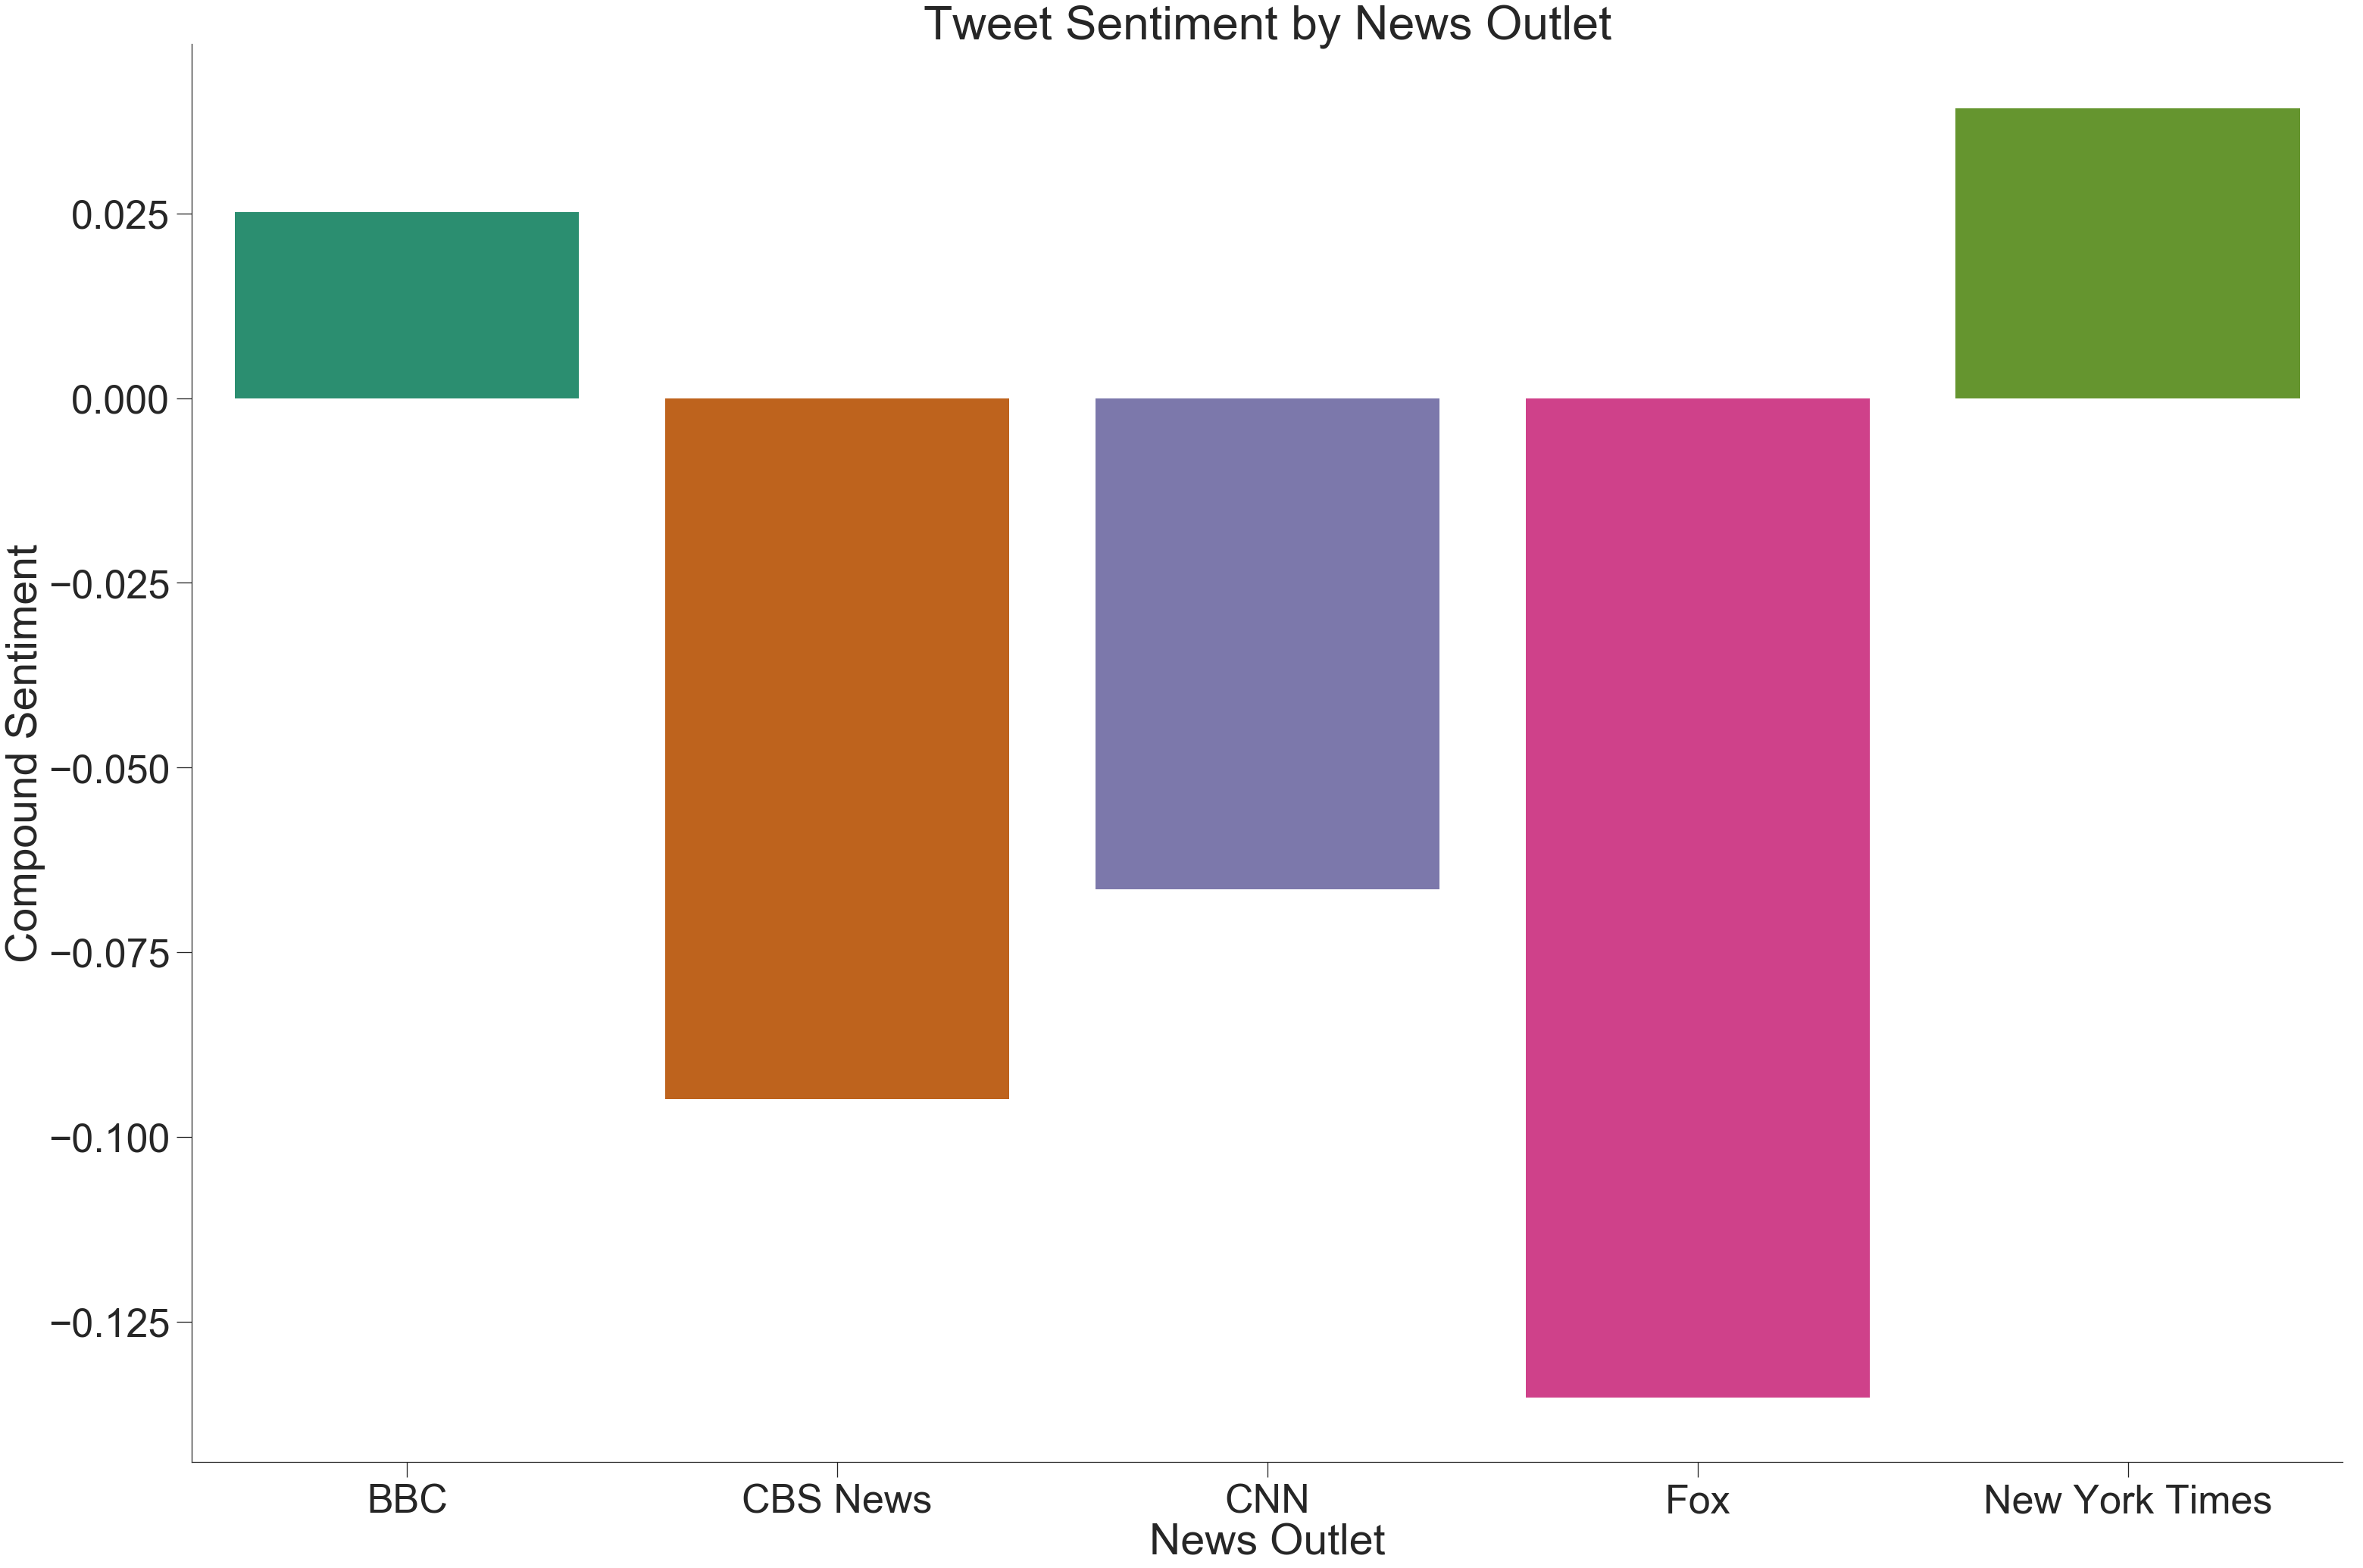

In [10]:
sns.set('talk', palette = 'Dark2', font_scale = 4)
sns.set_style('ticks', {'xtick.major.size' : 20, 'ytick.major.size' : 20})
sns.factorplot(x_axis, 'Compound', data = tweet_pivot, kind = 'bar', size = 30, aspect = 1.5)

plt.title('Tweet Sentiment by News Outlet')
plt.xlabel('News Outlet')
plt.ylabel('Compound Sentiment')


plt.show()

In [11]:
news_final = sentiment_final.drop(['Tweets_Ago'], axis = 1)

In [ ]:
news_final.to_csv